In [1]:
#Import the neccessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
import os
import pandas as pd

def process_heart_rate_folder(data_folder):
    """
    Process heart rate data files in a given folder and adjust the time index.

    Parameters:
    - data_folder: Path to the folder containing heart rate data files.

    Returns:
    - DataFrame containing heart rate data with adjusted time index.
    """
    dfs = []  # List to store processed data frames

    # Iterate over files in the folder
# Iterate over files in the folder
    for file_name in os.listdir(data_folder):
        if file_name.endswith('.CSV'):  # Check if file is a CSV file
            file_path = os.path.join(data_folder, file_name)
        
            # Process heart rate data from the file directly
            heart_rate_data = pd.read_csv(file_path)

            heart_rate_data = heart_rate_data['Date']

            heart_rate_data = heart_rate_data[2:]

            heart_rate_data.index.name = 'Time (seconds)'
            heart_rate_data.index = heart_rate_data.index*2
        
            # Append processed data to list
            dfs.append(heart_rate_data)

            # Concatenate all processed data frames into a single table
    heart_rate_table = pd.concat(dfs, axis=1)
    return heart_rate_table

In [3]:
#Modify column names
def column_names(data_folder):
    dates = []  # Initialize an empty list to store dates
    for filename in os.listdir(data_folder):
        file_path = os.path.join(data_folder, filename)
        date = filename.split('_')[2]  # Extract date from file name
        dates.append(date)  # Append the extracted date to the list
    return dates

In [4]:
# Create the table for Ben's heart
ben_column = column_names('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Ben_Nicholson_Heart_Rate/ben_heart')
ben_heart_rate_table = process_heart_rate_folder('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Ben_Nicholson_Heart_Rate/ben_heart')
ben_new_column_names = [f"Heart Rate (bpm) {date}" for date in ben_column]
ben_heart_rate_table.columns = ben_new_column_names
for column in ben_heart_rate_table.columns:
    ben_heart_rate_table[column] = ben_heart_rate_table[column].astype(float)
    ben_heart_rate_table[column] = ben_heart_rate_table[column].replace(0, np.nan)
ben_heart_rate_table

,Heart Rate (bpm) 2024-01-28,Heart Rate (bpm) 2024-01-26,Heart Rate (bpm) 2024-01-27,Heart Rate (bpm) 2024-01-23
Time (seconds),,,,
4,154.0,104.0,124.0,88.0
6,154.0,107.0,124.0,89.0
8,154.0,111.0,124.0,93.0
10,154.0,112.0,124.0,94.0
12,154.0,111.0,123.0,92.0
...,...,...,...,...
4486,NaN,NaN,170.0,NaN
4488,NaN,NaN,170.0,NaN
4490,NaN,NaN,170.0,NaN


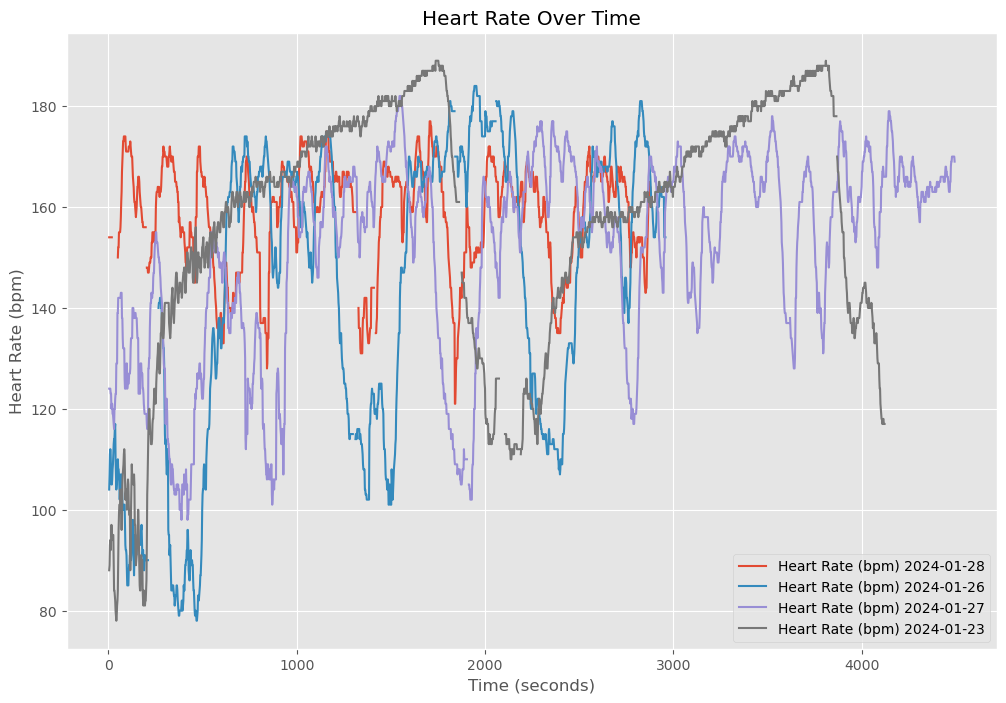

In [5]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is nev_heart_rate_table
# Plot each column (heart rate data) against the index (time in seconds)
for column in ben_heart_rate_table.columns:
    plt.plot(ben_heart_rate_table.index, ben_heart_rate_table[column], label=column)

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [6]:
# Create the table for Nev's heart
nev_column = column_names('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Ben_Nicholson_Heart_Rate/nev_heart')
nev_heart_rate_table = process_heart_rate_folder('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Ben_Nicholson_Heart_Rate/nev_heart')
nev_new_column_names = [f"Heart Rate (bpm) {date}" for date in nev_column]
nev_heart_rate_table.columns = nev_new_column_names
nev_heart_rate_table = nev_heart_rate_table.iloc[:, ::-1]
for column in nev_heart_rate_table.columns:
    nev_heart_rate_table[column] = nev_heart_rate_table[column].astype(float)
    nev_heart_rate_table[column] = nev_heart_rate_table[column].replace(0, np.nan)
nev_heart_rate_table

,Heart Rate (bpm) 2024-02-02,Heart Rate (bpm) 2024-01-28,Heart Rate (bpm) 2024-02-04,Heart Rate (bpm) 2024-01-23,Heart Rate (bpm) 2024-01-27,Heart Rate (bpm) 2024-01-26,Heart Rate (bpm) 2024-02-03
Time (seconds),,,,,,,
4,139.0,172.0,128.0,95.0,112.0,118.0,107.0
6,137.0,172.0,127.0,95.0,112.0,109.0,105.0
8,134.0,172.0,125.0,98.0,112.0,104.0,106.0
10,133.0,172.0,125.0,98.0,112.0,104.0,106.0
12,133.0,171.0,125.0,102.0,112.0,102.0,106.0
...,...,...,...,...,...,...,...
6602,NaN,NaN,161.0,NaN,NaN,NaN,NaN
6604,NaN,NaN,161.0,NaN,NaN,NaN,NaN
6606,NaN,NaN,157.0,NaN,NaN,NaN,NaN


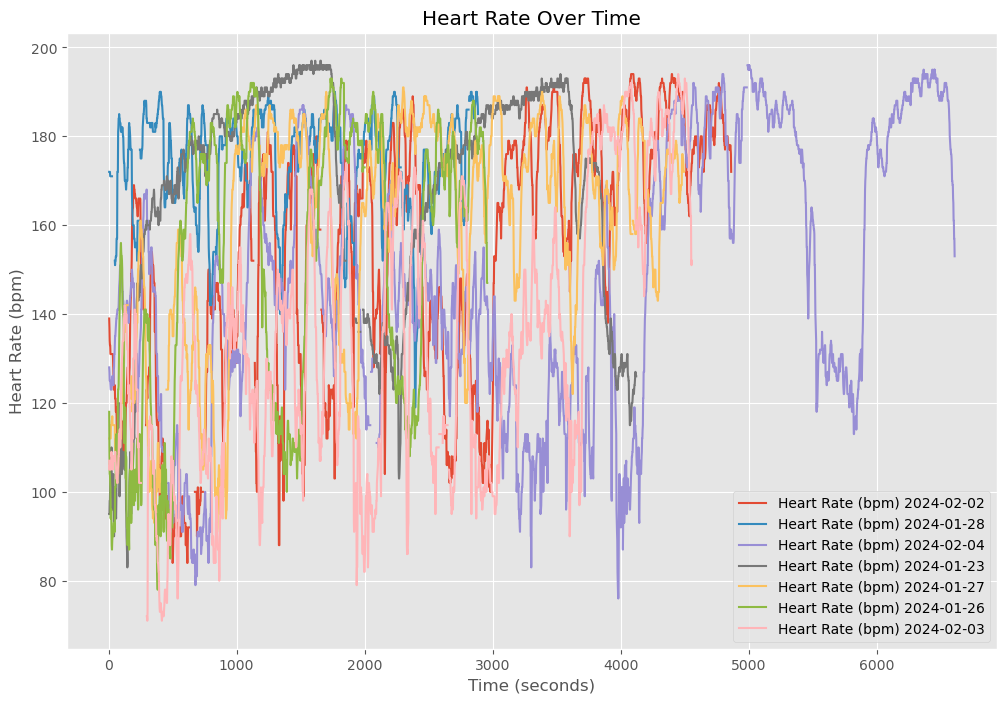

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is nev_heart_rate_table
# Plot each column (heart rate data) against the index (time in seconds)
for column in nev_heart_rate_table.columns:
    plt.plot(nev_heart_rate_table.index, nev_heart_rate_table[column], label=column)

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()


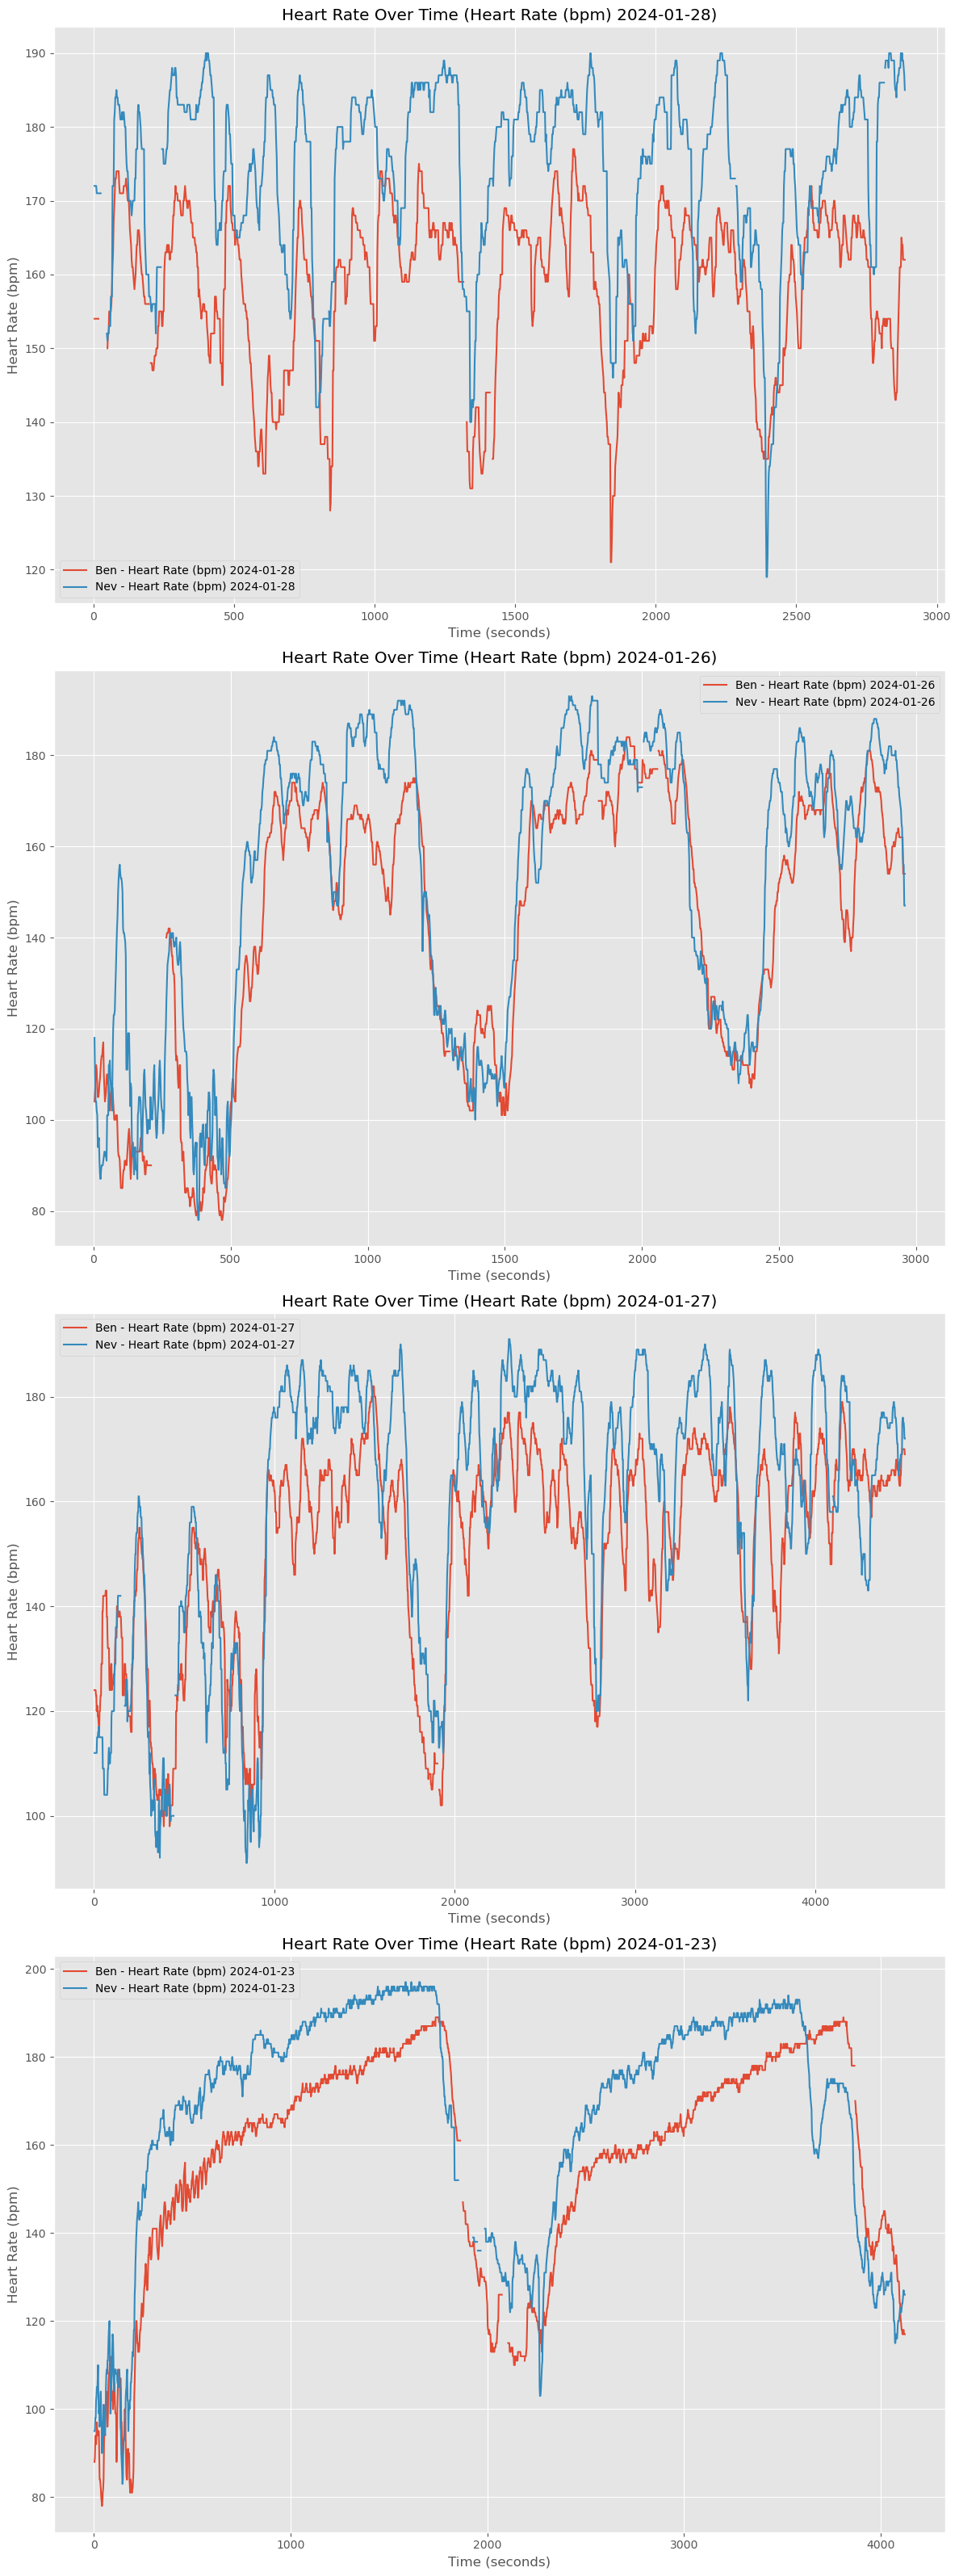

In [8]:
import matplotlib.pyplot as plt

# Get the number of columns in the heart rate tables
num_columns = len(ben_heart_rate_table.columns)

# Create subplots for each column
fig, axes = plt.subplots(num_columns, 1, figsize=(12, 8*num_columns))

# Plot Ben's and Nev's heart rate data for each column
for i, column in enumerate(ben_heart_rate_table.columns):
    axes[i].plot(ben_heart_rate_table.index, ben_heart_rate_table[column], label=f'Ben - {column}')
    axes[i].plot(nev_heart_rate_table.index, nev_heart_rate_table[column], label=f'Nev - {column}')
    axes[i].set_xlabel('Time (seconds)')
    axes[i].set_ylabel('Heart Rate (bpm)')
    axes[i].set_title(f'Heart Rate Over Time ({column})')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
